In [1]:
import MetaTrader5 as mt5

In [2]:
if mt5.initialize():
    print("MetaTrader5 initialized")
else:
    print("MetaTrader5 not initialized")

MetaTrader5 initialized


In [3]:
print(mt5.account_info())
print("\n")
print(mt5.terminal_info())

AccountInfo(login=31501023, trade_mode=0, leverage=500, limit_orders=50, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=9999.56, credit=0.0, profit=0.0, equity=9999.56, margin=0.0, margin_free=9999.56, margin_level=0.0, margin_so_call=100.0, margin_so_so=50.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Demo Derived', server='Deriv-Demo', currency='USD', company='Deriv.com Limited')


TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4282, maxbars=100000, codepage=0, ping_last=156958, community_balance=0.0, retransmission=2.0630560697438347, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\

In [4]:
total_market = mt5.symbols_total()
print(total_market)
markets = mt5.symbols_get("Volatility")
for market in markets:
    print(market.name)

291
Volatility 10 (1s) Index
Volatility 10 Index
Volatility 100 (1s) Index
Volatility 100 Index
Volatility 150 (1s) Index
Volatility 200 (1s) Index
Volatility 25 (1s) Index
Volatility 25 Index
Volatility 250 (1s) Index
Volatility 300 (1s) Index
Volatility 50 (1s) Index
Volatility 50 Index
Volatility 75 (1s) Index
Volatility 75 Index


In [5]:
rates = mt5.copy_rates_from_pos("Volatility 75 Index", mt5.TIMEFRAME_M30, 100, 99999)
print(rates)

[(1546318800, 110937.33, 111280.18, 110692.59, 111096.21, 840, 6000, 0)
 (1546320600, 111102.52, 112266.87, 111075.16, 111906.08, 900, 6000, 0)
 (1546322400, 111901.24, 112325.91, 111536.92, 111769.42, 900, 6000, 0)
 ...
 (1714120200, 235621.27, 236989.56, 235277.05, 236506.97, 900, 5577, 0)
 (1714122000, 236511.72, 238781.24, 236142.7 , 238173.15, 900, 5577, 0)
 (1714123800, 238218.03, 239323.24, 236607.13, 238769.86, 900, 5577, 0)]


In [6]:
display(rates)

array([(1546318800, 110937.33, 111280.18, 110692.59, 111096.21, 840, 6000, 0),
       (1546320600, 111102.52, 112266.87, 111075.16, 111906.08, 900, 6000, 0),
       (1546322400, 111901.24, 112325.91, 111536.92, 111769.42, 900, 6000, 0),
       ...,
       (1714120200, 235621.27, 236989.56, 235277.05, 236506.97, 900, 5577, 0),
       (1714122000, 236511.72, 238781.24, 236142.7 , 238173.15, 900, 5577, 0),
       (1714123800, 238218.03, 239323.24, 236607.13, 238769.86, 900, 5577, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [7]:
print(len(rates) - 1)

93217


In [8]:
x = []
y = []

i = 0
for rate in rates:
    if i == 0:
        i=1
    else:    
        x.append([rate[1],rate[2],rate[3],rate[4],rate[5]])
i = 0
for rate in rates:
    if i < len(rates) - 1:
        y.append(rate[4]) 
        i += 1
    else:
        print("done executing")   
    

done executing


In [9]:
import numpy as np

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
print(x.shape)
print(y.shape)

(93217, 5)
(93217,)


In [12]:
print(y)

[111096.21 111906.08 111769.42 ... 235616.13 236506.97 238173.15]


In [13]:
for i in range(3):
    x = np.concatenate([x,x])
    y = np.concatenate([y,y])

In [14]:
print(x.shape)
print(y.shape)

(745736, 5)
(745736,)


In [15]:
print(x)

[[111102.52 112266.87 111075.16 111906.08    900.  ]
 [111901.24 112325.91 111536.92 111769.42    900.  ]
 [111821.22 112389.49 111584.01 112294.98    900.  ]
 ...
 [235621.27 236989.56 235277.05 236506.97    900.  ]
 [236511.72 238781.24 236142.7  238173.15    900.  ]
 [238218.03 239323.24 236607.13 238769.86    900.  ]]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.001, random_state=40)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(744990, 5)
(746, 5)
(744990,)
(746,)


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train,y_train)
y_train = sc_y.fit_transform(y_train.reshape((len(y_train),1)))

x_test = sc_x.transform(x_test)
y_test = sc_y.transform(y_test.reshape((len(y_test),1)))

print(x_train.shape)
print(y_train.shape)

(744990, 5)
(744990, 1)


In [21]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [22]:
print(y_train.shape)
print(y_test.shape)

(744990,)
(746,)


In [23]:
print(x_train)

[[ 1.20542398  1.19996278  1.2021728   1.20296329  0.03360927]
 [-1.17309953 -1.17341688 -1.1731136  -1.17252286  0.03360927]
 [ 0.20267307  0.20017358  0.2093813   0.20771481  0.03360927]
 ...
 [-0.81628227 -0.81194472 -0.81184984 -0.80832988  0.03360927]
 [-0.35024862 -0.34956022 -0.34788779 -0.34574634  0.03360927]
 [-1.43281828 -1.43314059 -1.43351783 -1.43288269  0.03360927]]


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor = RandomForestRegressor(n_estimators=200, n_jobs = 8, random_state=40, verbose=2)

In [26]:
t_model = regressor.fit(x_train,y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


In [ ]:
print(t_model.score(x_test,y_test))

1.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
print(x_test[-1])

[-1.1080823  -1.1077536  -1.1083964  -1.1043919   0.03361793]


In [ ]:
y_pred = t_model.predict([x_test[-1]])
print(y_pred)
print(sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)))

[-1.10833085]
[[220562.2650611]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
print(y_test[-1])
print(sc_y.inverse_transform(y_test[-1].reshape(1,1)))
print(x_test[-1])

-1.1083308
[[220562.27]]
[-1.1080823  -1.1077536  -1.1083964  -1.1043919   0.03361793]


In [ ]:
import joblib

In [ ]:
joblib.dump(t_model,"v75i t_model.joblib")
joblib.dump(sc_x,"v75i sc_x.joblib")
joblib.dump(sc_y,"v75i sc_y.joblib")

['v75i sc_y.joblib']

In [ ]:
rates = mt5.copy_rates_from_pos("Volatility 75 Index", mt5.TIMEFRAME_H1, 0, 100)

In [ ]:
x = []
y = []

i = 0
for rate in rates:
    if i == 0:
        i=1
    else:    
        x.append([rate[1],rate[2],rate[3],rate[4],rate[5]])
i = 0
for rate in rates:
    if i < len(rates) - 1:
        y.append(rate[4]) 
        i += 1
    else:
        print("done executing") 

done executing


In [ ]:
x = np.array(x)
y = np.array(y)
x = sc_x.transform(x)
y = sc_y.transform(y.reshape((len(y),1)))

In [ ]:
y = y.reshape(-1)

In [ ]:
print(x)

[[-1.1057618 -1.088398  -1.1021423 -1.0845646 80.86071  ]
 [-1.0843124 -1.0781972 -1.0821126 -1.0741409 80.86071  ]
 [-1.0742278 -1.0754932 -1.0727159 -1.0751587 80.86071  ]
 [-1.0751289 -1.056642  -1.0719888 -1.0524421 80.68109  ]
 [-1.0526333 -1.0564622 -1.0606767 -1.0634265 80.7709   ]
 [-1.0633433 -1.0605884 -1.0642713 -1.0612432 80.86071  ]
 [-1.0616385 -1.0619625 -1.064657  -1.0648339 80.86071  ]
 [-1.0647246 -1.06559   -1.0645823 -1.0638512 80.86071  ]
 [-1.0639455 -1.0679009 -1.0708778 -1.0738097 80.86071  ]
 [-1.0737157 -1.0743182 -1.077128  -1.0730057 80.86071  ]
 [-1.0729338 -1.0715009 -1.0769726 -1.0690053 80.86071  ]
 [-1.068868  -1.0634993 -1.0657164 -1.0623547 80.86071  ]
 [-1.0623801 -1.0606364 -1.0601724 -1.0616498 80.86071  ]
 [-1.0612997 -1.0625105 -1.0655481 -1.0673649 80.86071  ]
 [-1.0675663 -1.0693345 -1.0694104 -1.0669495 80.86071  ]
 [-1.0672047 -1.0582309 -1.0678933 -1.0708876 80.86071  ]
 [-1.0708272 -1.0729641 -1.0721096 -1.0723356 80.86071  ]
 [-1.0722954 -

In [ ]:
print(t_model.score(x,y))

0.9999017306052214


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
y_pred = t_model.predict(x)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
print(y_pred)

[-1.10583639 -1.08454836 -1.07412827 -1.07515874 -1.05243215 -1.06342518
 -1.06166395 -1.06485525 -1.06418426 -1.07381136 -1.07277554 -1.06893364
 -1.06242476 -1.0615413  -1.0673742  -1.06711603 -1.07098239 -1.07232559
 -1.07178297 -1.07512547 -1.07322852 -1.08285417 -1.07708195 -1.07548344
 -1.06219646 -1.05884999 -1.056581   -1.05896769 -1.05534373 -1.06654531
 -1.06987116 -1.07779494 -1.08290094 -1.0864884  -1.06873452 -1.06988164
 -1.05918449 -1.06064662 -1.05945278 -1.05507183 -1.06768191 -1.05822582
 -1.06008769 -1.05607226 -1.0597485  -1.06468214 -1.06316656 -1.07007754
 -1.07418541 -1.06784335 -1.07023583 -1.06612674 -1.06647399 -1.05474941
 -1.05883873 -1.06515973 -1.06472562 -1.05265563 -1.03795231 -1.02989679
 -1.02757431 -1.02709698 -1.03846278 -1.03794219 -1.034411   -1.02994189
 -1.03386754 -1.03195935 -1.04948556 -1.03793314 -1.04310815 -1.03403054
 -1.04872868 -1.05623364 -1.05541823 -1.06365358 -1.06215364 -1.08219907
 -1.08748663 -1.08493707 -1.07108489 -1.07773787 -1

In [ ]:
y = sc_y.inverse_transform(y.reshape((len(y),1)))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))

In [ ]:
print(y)



[[221173.48]
 [226388.89]
 [228942.98]
 [228693.58]
 [234259.88]
 [231568.36]
 [232103.34]
 [231223.52]
 [231464.27]
 [229024.14]
 [229221.14]
 [230201.39]
 [231831.  ]
 [232003.72]
 [230603.33]
 [230705.12]
 [229740.17]
 [229385.33]
 [229529.64]
 [228699.92]
 [229203.08]
 [226815.92]
 [228244.11]
 [228610.92]
 [231857.98]
 [232685.95]
 [233239.3 ]
 [232631.47]
 [233578.84]
 [230798.56]
 [229985.2 ]
 [228040.2 ]
 [226801.05]
 [225912.52]
 [230274.77]
 [230021.22]
 [232582.52]
 [232255.42]
 [232533.17]
 [233612.44]
 [230522.56]
 [232864.45]
 [232393.17]
 [233367.23]
 [232465.97]
 [231274.02]
 [231505.89]
 [229927.14]
 [228935.39]
 [230411.88]
 [229864.45]
 [230938.33]
 [230846.36]
 [233683.64]
 [232824.22]
 [231213.52]
 [231221.06]
 [234253.48]
 [237767.12]
 [239694.64]
 [240330.5 ]
 [240429.89]
 [237622.25]
 [237778.94]
 [238560.19]
 [239788.  ]
 [238801.84]
 [239120.2 ]
 [235083.62]
 [237858.8 ]
 [236506.98]
 [238769.86]
 [235169.39]
 [233256.73]
 [233501.48]
 [231510.2 ]
 [231852.75]

In [ ]:
print(y_pred)

[[221173.48651349]
 [226389.73728833]
 [228942.99477916]
 [228690.49547289]
 [234259.24036125]
 [231565.59501516]
 [231997.15474949]
 [231215.18285188]
 [231379.59558055]
 [229020.64765322]
 [229274.45644851]
 [230215.84658495]
 [231810.73089205]
 [232027.20581367]
 [230597.95843075]
 [230661.21773334]
 [229713.83660432]
 [229384.70999078]
 [229517.66942417]
 [228698.64976587]
 [229163.46243007]
 [226804.87013576]
 [228219.2475304 ]
 [228610.93430266]
 [231866.67218697]
 [232686.66410363]
 [233242.63873136]
 [232657.82438251]
 [233545.80997562]
 [230801.0644714 ]
 [229986.12342009]
 [228044.54276719]
 [226793.40794441]
 [225914.36677763]
 [230264.63651585]
 [229983.55672814]
 [232604.70054829]
 [232246.43305745]
 [232538.96203802]
 [233612.43457443]
 [230522.56043077]
 [232839.60573187]
 [232383.38770299]
 [233367.29694493]
 [232466.50126017]
 [231257.59972202]
 [231628.96648455]
 [229935.55473983]
 [228928.99466782]
 [230483.00249968]
 [229896.76766342]
 [230903.62728506]
 [230818.538

In [ ]:
import matplotlib.pyplot as plt

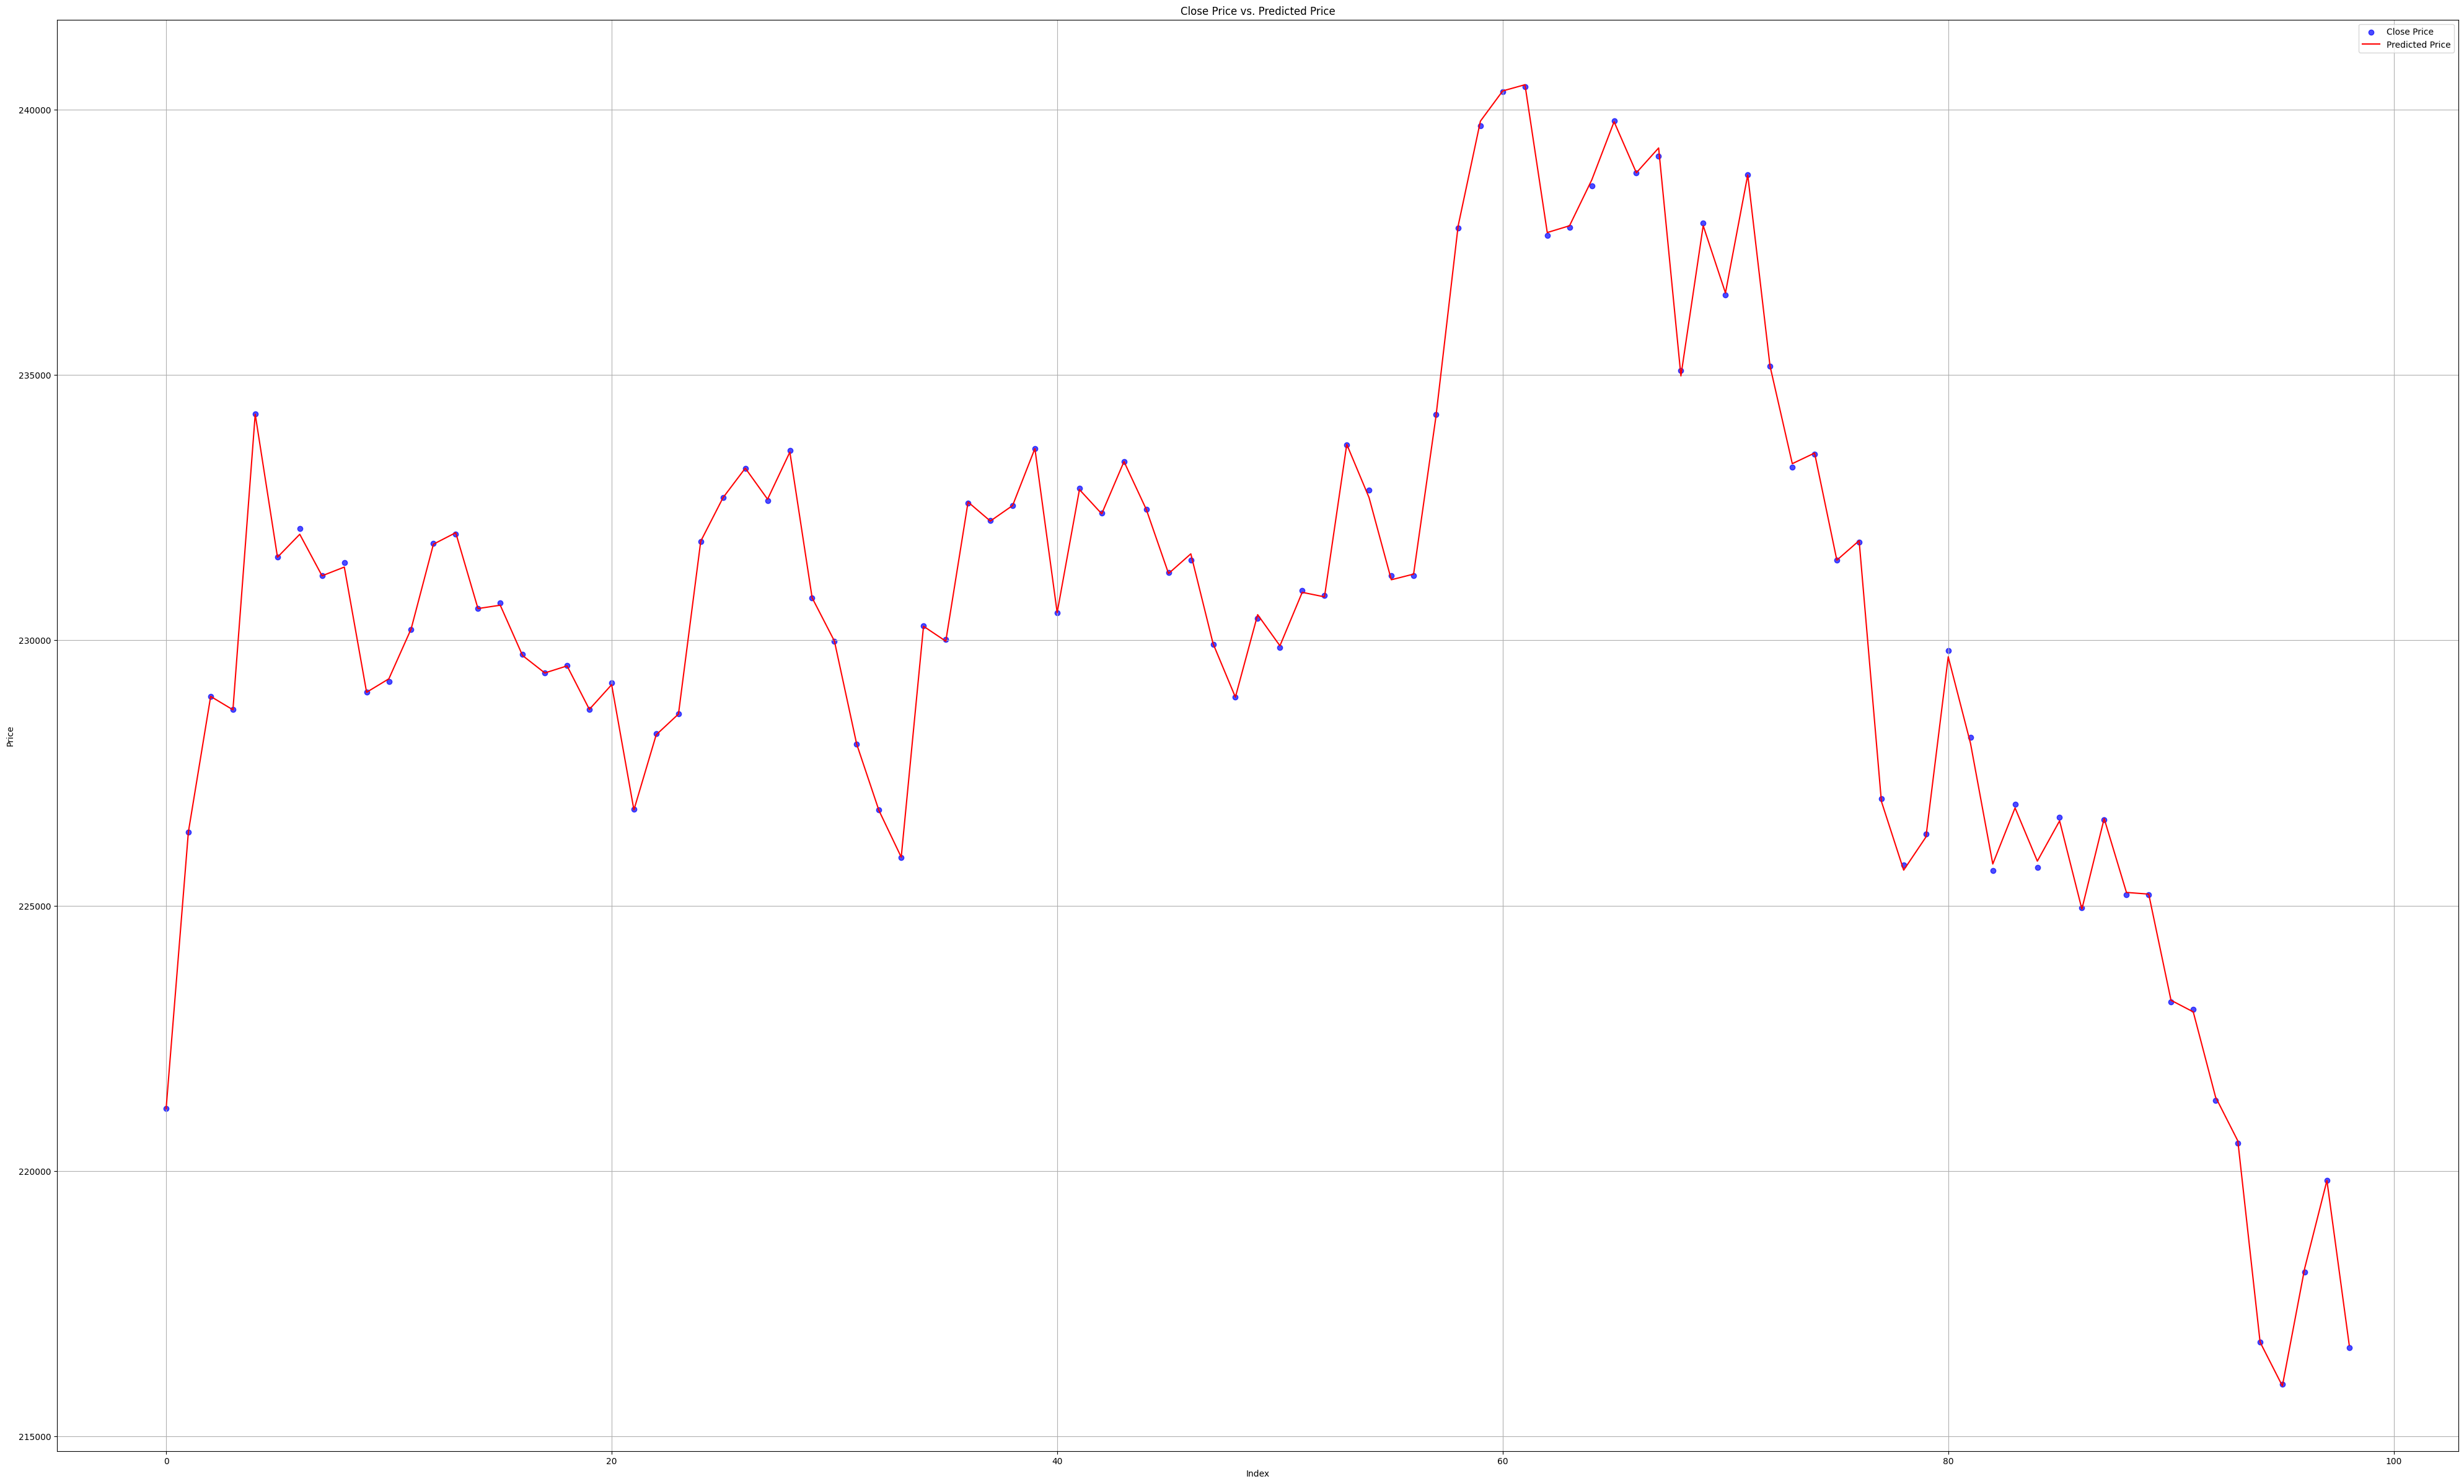

In [ ]:
plt.figure(figsize=(40, 20))  # Adjust figure size as needed

# Plot close price as scatter chart
plt.scatter(range(len(y)), y, label='Close Price', color='blue', alpha=0.7)

# Plot predicted price as line graph
plt.plot(range(len(y_pred)), y_pred, label='Predicted Price', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Close Price vs. Predicted Price')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()